Зробити Гаусса, Хаара
Вивести початковий сигнал та відновлений
Для відновлення при Гауссівському батьківському вейвлеті додати нормуючий множник 8

In [1]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

In [2]:
NG = 52
M = 3
n = NG / 8
N = 2 ** n
M1 = N

In [3]:
i = np.arange(N)

s1 = 2 * np.random.uniform(0,1) + NG * np.cos(2 * M * np.pi * i / N) * (1 + 0.1 * np.random.uniform(0,1)) +\
17 * np.cos(4 * M * np.pi * i / N + np.random.uniform(0,1)) +\
3 * np.cos(7 * M * np.pi * i / N) * (np.random.uniform(0,1) + NG)

In [4]:
Gauss = True
Haar = False
def g1(t):
    global Gauss, Haar
    if Gauss:
        return np.exp(- (t ** 2) / 2) 
    elif Haar:
        if 0 <= t <= 1/2:
            return 1
        elif 1/2 <= t <= 1:
            return -1
        else:
            return 0

In [5]:
def f2(j, k, x):
    return 2 ** (j/2) * g1((2 ** j) * x - k)

In [6]:
def W(l, j):
    return np.sum(s1[i] * f2(l, j, i) for i in range(0,int(N)))

In [7]:
def pr(i, l):
    return np.sum(W(l,j) * f2(l, j, i) / 2 ** (2 * l) for j in range(0,int(M1+1)))
def d(i):
    return np.sum(pr(i,l) for l in range(0,M + 1))

In [8]:
d = np.array([d(i) for i in np.arange(N)])

In [9]:
d

array([  912.81695024,  1021.98651043,   496.93430274,  -191.43926033,
        -652.83264554,  -672.42821801,  -281.67343479,   277.01170299,
         679.8098817 ,   688.01930166,   269.71769898,  -384.6515832 ,
        -926.57287178, -1137.72599289,  -911.71108932,  -375.06279583,
         189.22883421,   486.63941441,   362.57425437,  -116.92404829,
        -696.67346208, -1060.51309155,  -991.25015475,  -444.97678002,
         238.74783492,   838.25415048,  1102.4617163 ,   945.53337868,
         487.86254911,    -8.57249591,  -275.71112507,  -176.61792499,
         225.42665928,   700.94865645,   973.82211108,   865.13867678,
         387.78669922,  -256.81147705,  -778.53711238,  -944.4868939 ,
        -696.85681609,  -182.7536848 ,   319.50529374,   540.53450926,
         356.12279431,  -116.5029507 ,  -559.00549489,  -828.11541046,
        -807.57905532,  -505.56503746,   -67.78809628,   298.33201407,
         429.60582395,   289.65137078,   -13.94301506,  -286.53246047,
      

In [10]:
s1

array([ 225.86858977,  179.97966716,   70.65363084,  -50.33848431,
       -126.47021654, -124.66911386,  -51.60694225,   50.13872863,
        124.04749238,  128.55268565,   58.18488685,  -53.75731275,
       -152.31974746, -189.03287897, -146.71911224,  -48.31068536,
         54.83295056,  109.175621  ,   86.46021895,   -1.62822796,
       -109.10410903, -178.82498362, -171.43334416,  -85.42784724,
         41.82210721,  152.64909842,  197.85185038,  161.09736641,
         66.63620655,  -33.51370588,  -86.33733772,  -64.90018089,
         18.04091355,  116.79350276,  176.37398466,  160.96005726,
         72.61793246,  -49.28377567, -147.73238953, -176.84525148,
       -125.14288334,  -21.47267047,   79.47108293,  124.72965803,
         89.80807793,   -8.9823269 , -122.80572411, -194.99016822,
       -189.59367268, -109.37229307,    5.92287481,   99.98964582,
        128.71059002,   82.53394096,   -8.8931674 ,  -92.18368397,
       -117.86723104,  -66.12788201,   42.5318869 ,  157.19763

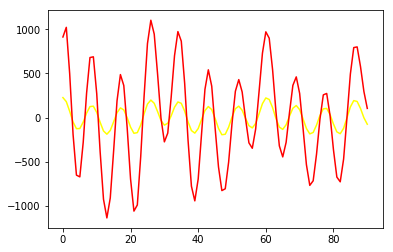

In [11]:
plt.plot(s1, color="yellow")
plt.plot(d, color="red")
plt.show()

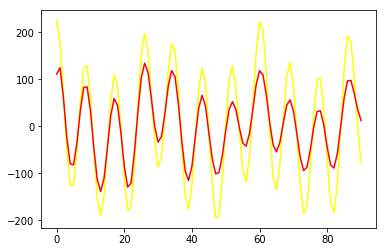

In [12]:
plt.plot(s1, color="yellow")
plt.plot(d/8.2, color="red")
plt.show()

In [13]:
def W1(l):
    return np.sum(W(l, j) for j in range(0,int(M1+1)))
W2 = np.array([W1(l) for l in range(0,M+1)])

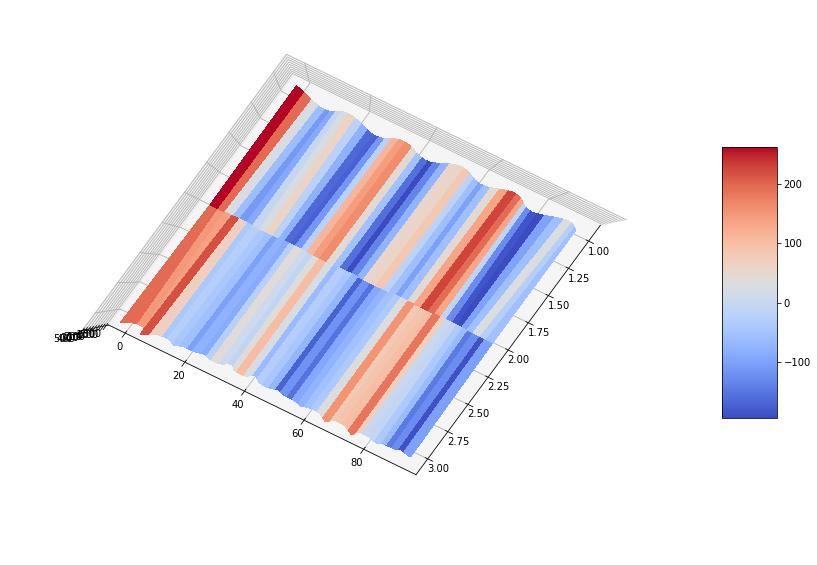

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize = (15,10))
ax = fig.gca(projection='3d')


l = np.arange(1, M+1)
j = np.arange(1, M1+1)

X, Y = np.meshgrid(l, j)
zs = np.array([W(l,j) for l,j in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)


# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.view_init(90, 30)

plt.show()